# Plot SpecParam Results
Plot schematic of LFP spectral parameterization results (exponent, r-squared, and stimulus-evoked changes in these parameters) 

#### Set path

In [2]:
# Define paths
REPO_PATH = r"C:\Users\Andre\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'


#### Imports

In [3]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import odml
import os

# custom
import sys
sys.path.append(REPO_PATH)
from scripts.plots import plot_schematic

#### Settings

In [4]:
# Session of interest (will ultimately apply to all sessions)
SESSIONS = ["A_SNR_041018", "A_SNR_140819", "L_SNR_250717"]
SESSION = "A_SNR_140819"

#### Functions

### Demo plotting function on arbitrary data

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.


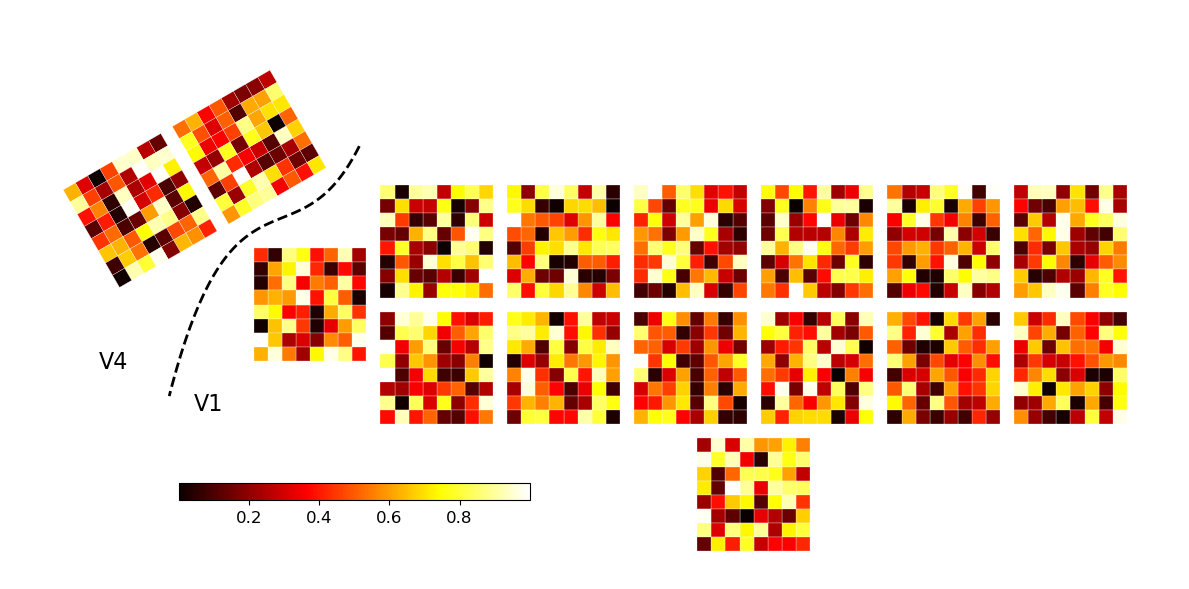

In [5]:
# define odml file path (contains metadata including electrode positions)
odml_path = fr"{PROJECT_PATH}\data\dataset\{SESSION}\metadata_{SESSION}.odml"

# define arbitrary data
data = np.random.rand(1024)

# plot
fig, ax = plot_schematic(data, odml_path)

### Main

##### create directory for figures

In [6]:
dir_figs = f"{PROJECT_PATH}/figures/params_schematic"
if not os.path.exists(dir_figs):
    os.makedirs(dir_figs)

##### load data (DataFrame of SpecParam results)

In [7]:
df_allsessions = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_spectral_params.csv")
df_allsessions

,Unnamed: 0,session,channel,chan_idx,array,epoch,offset,knee,exponent,r2
0,0,A_SNR_041018,0,0,1,pre,8.816475,2737.235791,3.486568,0.998865
1,1,A_SNR_041018,1,1,1,pre,8.631928,2382.862075,3.412634,0.996765
2,2,A_SNR_041018,2,2,1,pre,8.151474,1142.595414,3.178614,0.996802
3,3,A_SNR_041018,3,3,1,pre,8.487444,2699.286151,3.391134,0.998620
4,4,A_SNR_041018,4,4,1,pre,8.229084,1406.120254,3.258810,0.997916
...,...,...,...,...,...,...,...,...,...,...
6139,6139,L_SNR_250717,59,1019,16,post,8.072765,368.888266,2.765816,0.998221
6140,6140,L_SNR_250717,60,1020,16,post,8.280201,823.197397,2.800549,0.999511
6141,6141,L_SNR_250717,61,1021,16,post,8.571924,1261.398404,2.944253,0.999020
6142,6142,L_SNR_250717,62,1022,16,post,8.790193,2288.213887,3.043717,0.998485


##### Plot schematic of exponent results
3 plots: pre-stimulus exponent, post-stimulus exponent, and change in exponent

In [12]:
# setting limits for colorbar
limits = np.append(df_allsessions['exp_pre'],df_allsessions['exp_post'])
maxlim = max(limits)
minlim = min(limits)


warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[Non

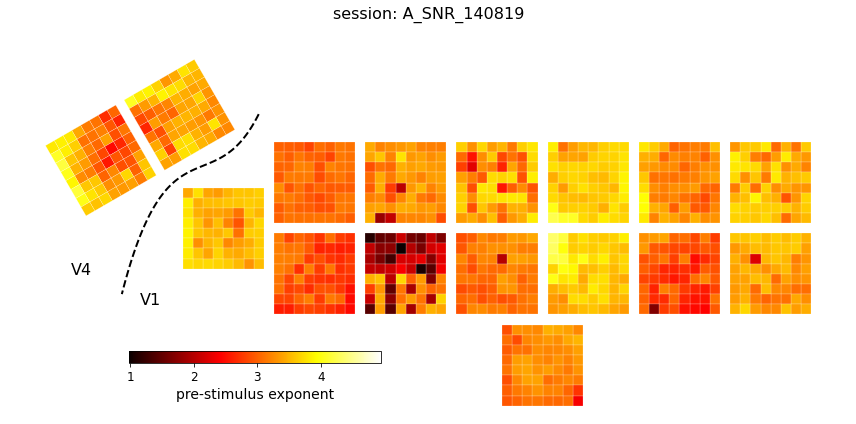

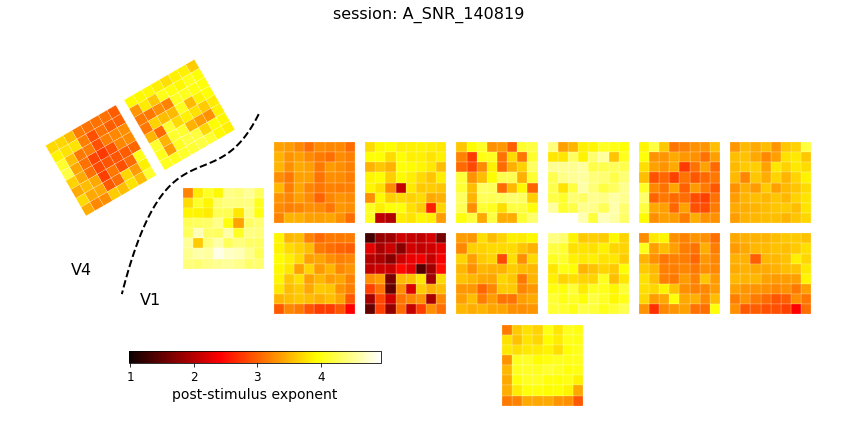

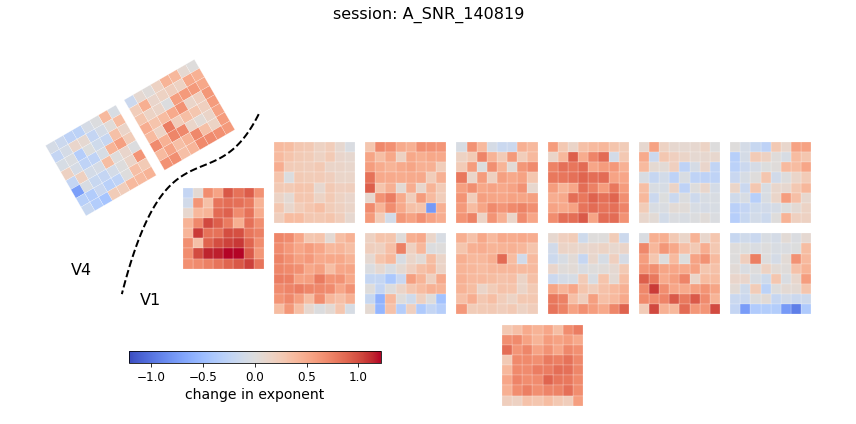

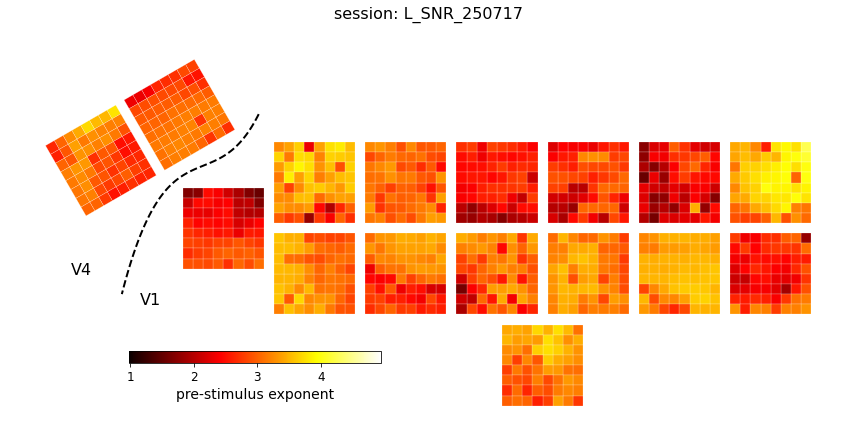

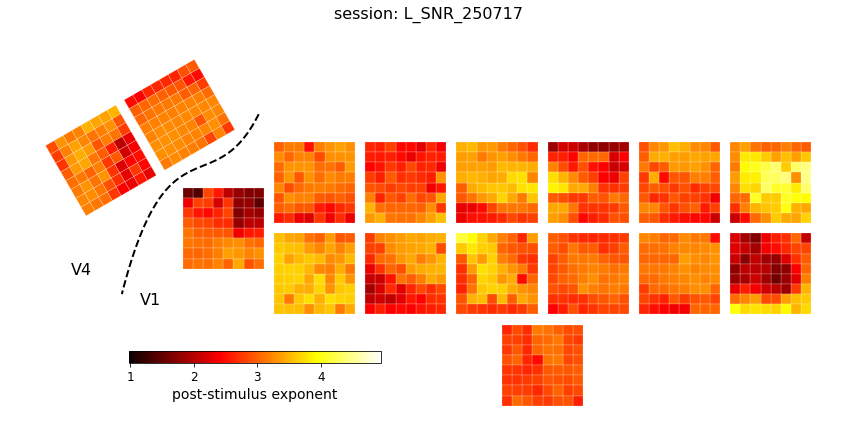

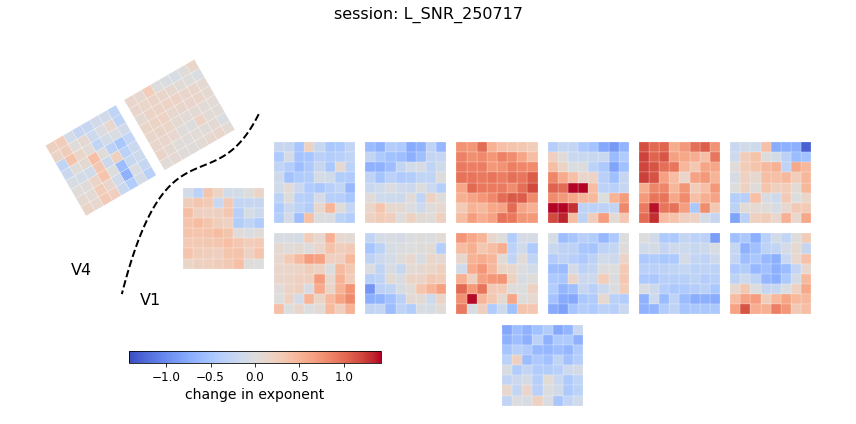

In [13]:
for session in SESSIONS:
    # get data for session
    df_session = df_allsessions[df_allsessions['session']==session]

    # pre-stimulus
    fig, ax = plot_schematic(df_session['exp_pre'], odml_path, title = f"session: {session}", label = "pre-stimulus exponent", vmin = minlim, vmax = maxlim, fname_out= f"{dir_figs}/{session}_exp_pre.png")

    # post-stimulus
    fig, ax = plot_schematic(df_session['exp_post'], odml_path, title = f"session: {session}", label = "post-stimulus exponent", vmin = minlim, vmax = maxlim, fname_out= f"{dir_figs}/{session}_exp_post.png")

    # change in exponent
    change = df_session['exp_post'] - df_session['exp_pre']
    ch_max = max(change)
    ch_min = min(change)
    fig, ax = plot_schematic(change, odml_path, norm_type = "centered", title = f"session: {session}", label = "change in exponent", vmin = ch_min, vmax = ch_max, fname_out= f"{dir_figs}/{session}_exp_change.png")


##### Plot schematic of goodness-of-fit results
3 plots: pre-stimulus r-squared, post-stimulus r-squared, and difference in r-squared

In [14]:
# setting limits for colorbar
lims = np.append(df_allsessions['r2_pre'],df_allsessions['r2_post'])
maxli = max(lims)
minli = min(lims)

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[Non

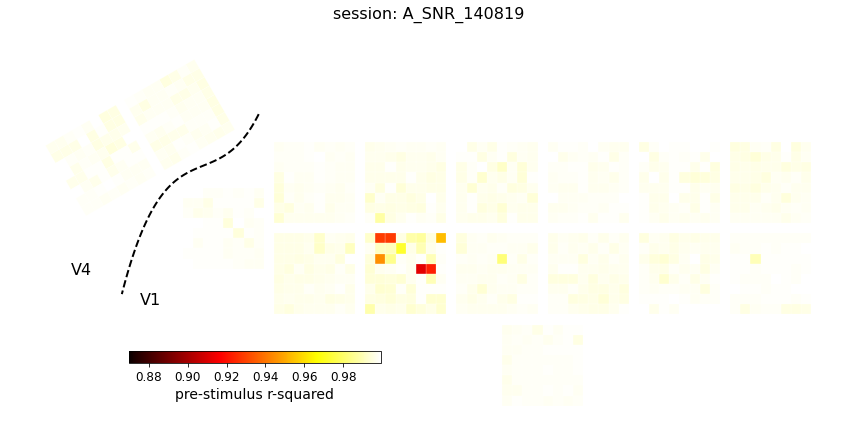

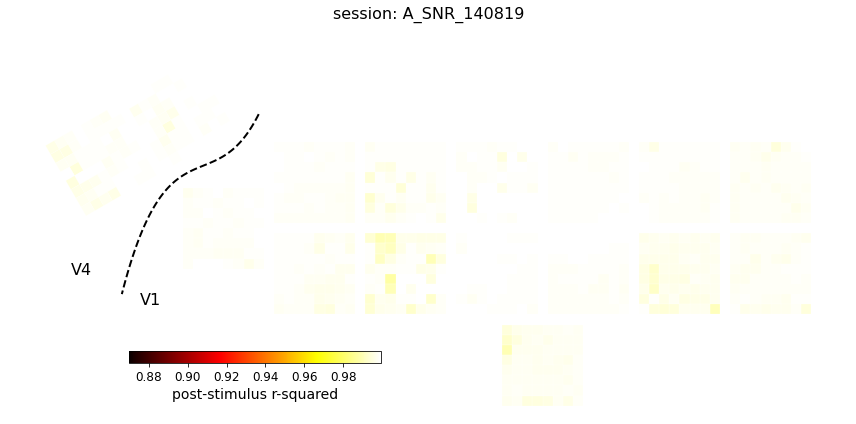

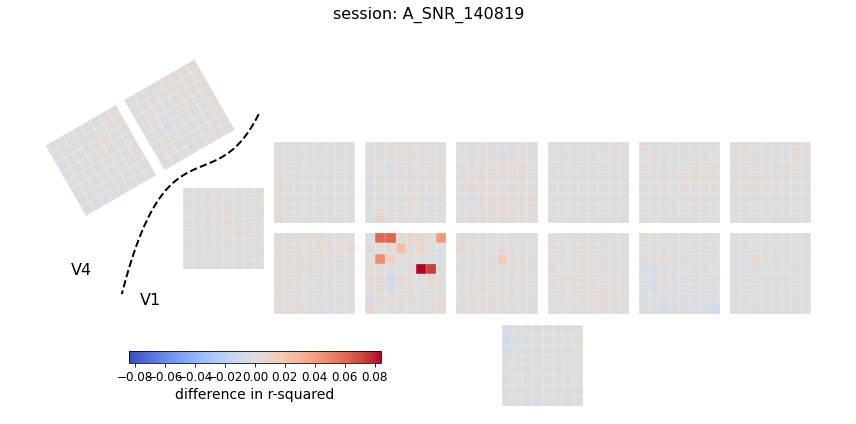

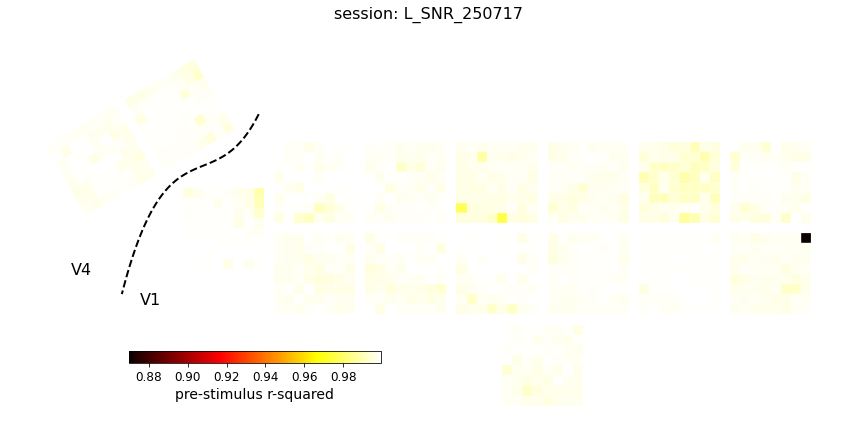

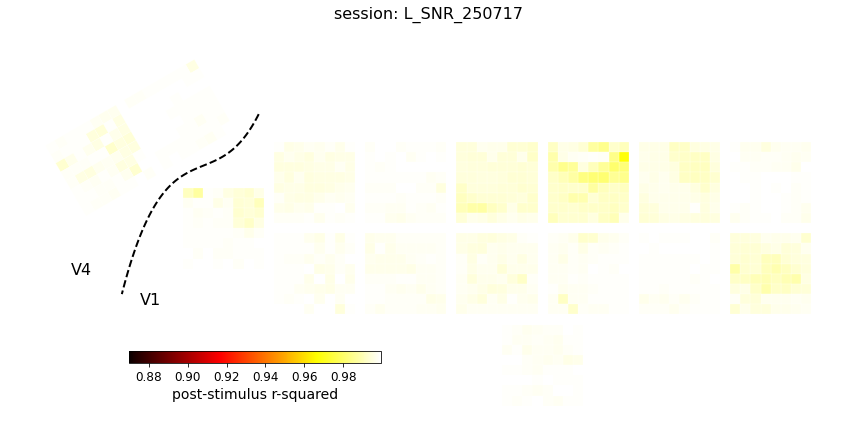

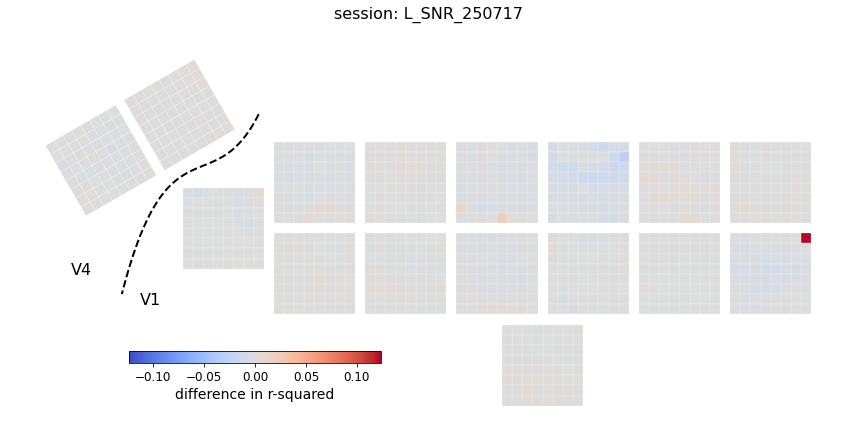

In [17]:
for session in SESSIONS:
    # get data for session
    df_session = df_allsessions[df_allsessions['session']==session]
    
    # pre-stimulus
    fig, ax = plot_schematic(df_session['r2_pre'], odml_path, title = f"session: {session}", label = "pre-stimulus r-squared", vmin = minli, vmax = maxli, fname_out= f"{dir_figs}/{session}_r2_pre.png")

    # post-stimulus
    fig, ax = plot_schematic(df_session['r2_post'], odml_path, title = f"session: {session}", label = "post-stimulus r-squared", vmin = minli, vmax = maxli, fname_out= f"{dir_figs}/{session}_r2_post.png")

    # change in exponent
    diff = df_session['r2_post'] - df_session['r2_pre']
    diff_max = max(diff)
    diff_min = min(diff)
    fig, ax = plot_schematic(diff, odml_path, norm_type="centered", title=f"session: {session}", label="difference in r-squared", vmin=np.min(diff), vmax=np.max(diff), fname_out=f"{dir_figs}/{session}_r2_diff.png")


In [12]:
# create function for plot_Schematic
def diff_schematic(df, var_pre, var_post, label, sessions = SESSIONS) :
    """
    df : dataFrame
    var : str
      variable of interest 
    sessions : str, optional
        session(s) of interest
    """
    for session in sessions:
        # get data for session
        df_session = df[df['session']==session]
        
        # pre-stimulus
        fig, ax = plot_schematic(df_session[var_pre], odml_path, title = f"session: {session}", label = f"pre-stimulus {label}", vmin = minli, vmax = maxli, fname_out= f"{dir_figs}/{session}_{var_pre}.png")

        # post-stimulus
        fig, ax = plot_schematic(df_session[var_post], odml_path, title = f"session: {session}", label = f"post-stimulus {label}", vmin = minli, vmax = maxli, fname_out= f"{dir_figs}/{session}_{var_post}.png")

        # change in exponent
        diff = df_session[var_pre] - df_session[var_post]
        diff_max = max(diff)
        diff_min = min(diff)
        fig, ax = plot_schematic(diff, odml_path, norm_type="centered", title=f"session: {session}", label=f"difference in {label}", vmin=np.min(diff), vmax=np.max(diff), fname_out=f"{dir_figs}/{session}_{label}_diff.png")


In [10]:
params_diff_df=pd.read_csv(fr"{PROJECT_PATH}\data\results\spectral_params_diff.csv", index_col=0)
params_diff_df

,session,channel,chan_idx,array,offset_post,knee_post,exponent_post,r2_post,offset_pre,knee_pre,exponent_pre,r2_pre,exp_diff,offset_diff
0,A_SNR_041018,0,0,1,8.191820,823.507427,2.943896,0.998326,8.816475,2737.235791,3.486568,0.998865,-0.542673,-0.624655
1,A_SNR_041018,1,1,1,8.584232,2931.311524,3.199538,0.996887,8.631928,2382.862075,3.412634,0.996765,-0.213095,-0.047696
2,A_SNR_041018,2,2,1,8.439394,1957.537472,3.137555,0.997652,8.151474,1142.595414,3.178614,0.996802,-0.041059,0.287920
3,A_SNR_041018,3,3,1,8.716438,3361.041106,3.330809,0.996622,8.487444,2699.286151,3.391134,0.998620,-0.060325,0.228994
4,A_SNR_041018,4,4,1,8.668195,2800.127407,3.319576,0.998047,8.229084,1406.120254,3.258810,0.997916,0.060765,0.439111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,L_SNR_250717,59,1019,16,8.072765,368.888266,2.765816,0.998221,7.527530,421.936825,2.804417,0.995542,-0.038601,0.545234
3068,L_SNR_250717,60,1020,16,8.280201,823.197397,2.800549,0.999511,7.350936,214.690632,2.610531,0.996774,0.190018,0.929265
3069,L_SNR_250717,61,1021,16,8.571924,1261.398404,2.944253,0.999020,7.973004,862.206119,3.011786,0.996864,-0.067533,0.598920
3070,L_SNR_250717,62,1022,16,8.790193,2288.213887,3.043717,0.998485,8.072889,1156.365207,3.075089,0.997915,-0.031372,0.717304


In [13]:
diff_schematic(df=params_diff_df, var_pre="offset_pre", var_post="offset_post", label="offset")

NameError: name 'minli' is not defined